Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
# Verificar tipos de dados
print(df.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [4]:
# Verificar valores faltantes por coluna
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


In [5]:
# Estatísticas descritivas
print(df.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

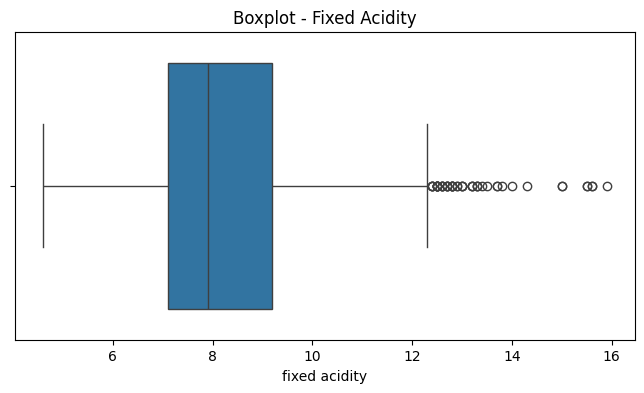

In [6]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['fixed acidity'])
plt.title('Boxplot - Fixed Acidity')
plt.show()

In [7]:
#Trtar outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtrar linhas sem outliers em nenhuma coluna
df_sem_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Dados originais: {df.shape}')
print(f'Dados sem outliers: {df_sem_outliers.shape}')

Dados originais: (1599, 12)
Dados sem outliers: (1179, 12)


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


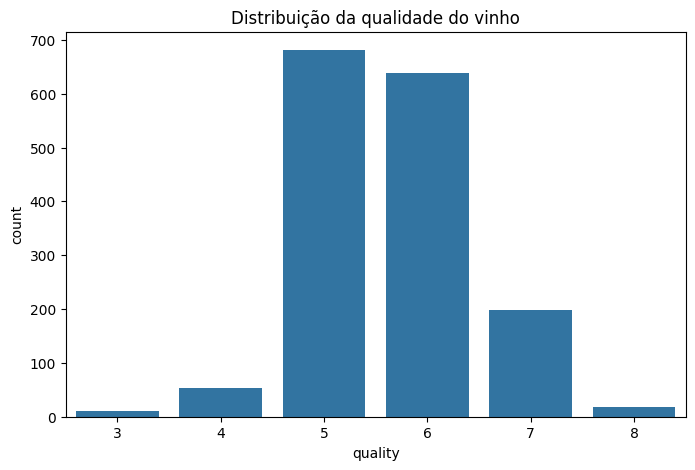

In [8]:
# Frequência dos valores da variável target
print(df['quality'].value_counts())

# Visualizar com gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df)
plt.title('Distribuição da qualidade do vinho')
plt.show()


In [9]:
def agrupar_qualidade(q):
    if q <= 4:
        return 'baixa'
    elif q <= 6:
        return 'media'
    else:
        return 'alta'

df['quality_group'] = df['quality'].apply(agrupar_qualidade)

print(df['quality_group'].value_counts())


quality_group
media    1319
alta      217
baixa      63
Name: count, dtype: int64


In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar features e target
X = df.drop(columns=['quality', 'quality_group'])
y = df['quality_group']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train_smote.value_counts())


quality_group
media    989
baixa    989
alta     989
Name: count, dtype: int64


In [11]:
corr = df.select_dtypes(include=['number']).corr()
print(corr['quality'].sort_values(ascending=False))


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['quality_group_num'] = le.fit_transform(df['quality_group'])


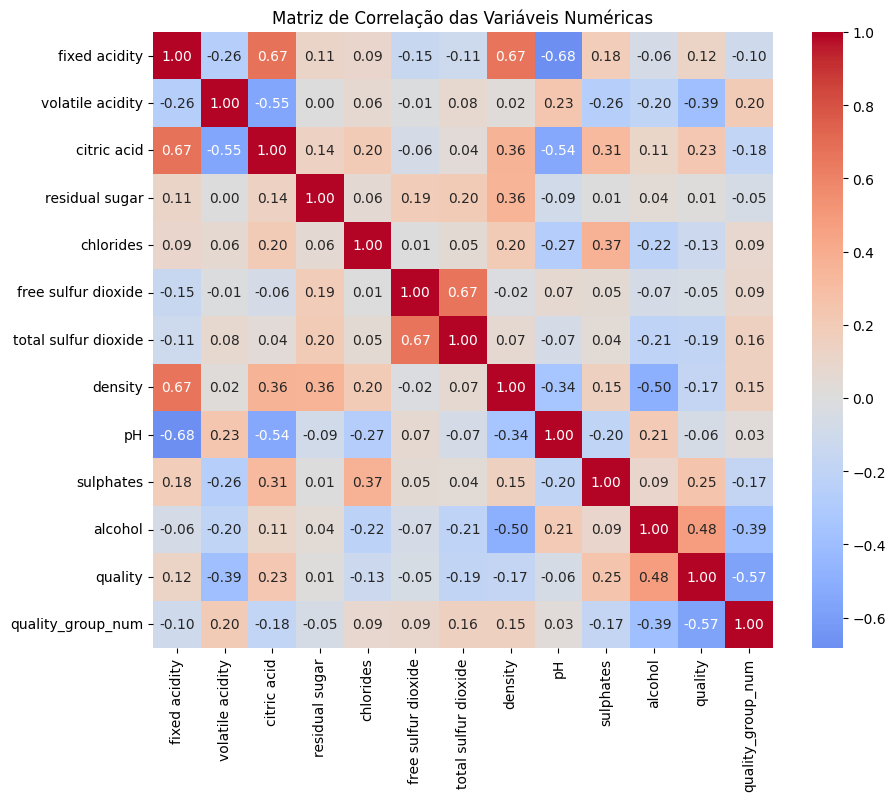

In [13]:

# Selecionar só as colunas numéricas
numericas = df.select_dtypes(include=['number'])

# Calcular a correlação
corr = numericas.corr()

# Plotar heatmap com as correlações
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


variáveis que te parecem mais "fortes" na correlação para nosso modelo.

alcohol (correlação ~+0.48)

sulphates (~+0.25)

citric acid (~+0.23)

volatile acidity (~-0.39)

total sulfur dioxide (~-0.19)

density (~-0.17)

chlorides (~-0.13)

In [14]:
# Lista das colunas selecionadas
colunas_selecionadas = [
    'quality',
    'alcohol',
    'sulphates',
    'citric acid',
    'volatile acidity',
    'total sulfur dioxide',
    'density',
    'chlorides'
]

# Novo dataframe com as variáveis selecionadas
df_selecionado = df[colunas_selecionadas]

# Visualizar as primeiras linhas
print(df_selecionado.head())


   quality  alcohol  sulphates  citric acid  volatile acidity  \
0        5      9.4       0.56         0.00              0.70   
1        5      9.8       0.68         0.00              0.88   
2        5      9.8       0.65         0.04              0.76   
3        6      9.8       0.58         0.56              0.28   
4        5      9.4       0.56         0.00              0.70   

   total sulfur dioxide  density  chlorides  
0                  34.0   0.9978      0.076  
1                  67.0   0.9968      0.098  
2                  54.0   0.9970      0.092  
3                  60.0   0.9980      0.075  
4                  34.0   0.9978      0.076  


In [15]:
# Separando features (X) e target (Y)
X = df_selecionado.drop(columns=['quality'])  # remove a coluna 'quality' do conjunto de variáveis explicativas
y = df_selecionado['quality']                  # mantém apenas a coluna 'quality' como target

# Visualizar shapes para confirmar
print(f"Shape de X (features): {X.shape}")
print(f"Shape de y (target): {y.shape}")


Shape de X (features): (1599, 7)
Shape de y (target): (1599,)


In [16]:
# Separar em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as dimensões
print(f"Treino - X: {X_train.shape}, y: {y_train.shape}")
print(f"Teste  - X: {X_test.shape}, y: {y_test.shape}")

Treino - X: (1279, 7), y: (1279,)
Teste  - X: (320, 7), y: (320,)


In [17]:
# Instanciar o modelo
modelo_rf = RandomForestClassifier(random_state=42)

# Treinar o modelo com os dados de treino
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Prever com o conjunto de teste
y_pred = modelo_rf.predict(X_test)

# Ver algumas previsões
print(y_pred[:10])

[5 5 5 5 6 5 5 5 6 6]


In [19]:
# Fazer previsões com a base de teste
y_pred = modelo_rf.predict(X_test)


In [20]:


# Acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia: 0.675

Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.77      0.74       130
           6       0.63      0.72      0.67       132
           7       0.70      0.50      0.58        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.65      0.68      0.66       320


Matriz de Confusão:
[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 100  29   1   0]
 [  0   0  32  95   5   0]
 [  0   0   0  20  21   1]
 [  0   0   0   2   3   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [22]:
pip install imbalanced-learn


In [23]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Separar X e y (caso ainda não tenha feito)
X = df[['alcohol', 'sulphates', 'citric acid', 'volatile acidity',
        'total sulfur dioxide', 'density', 'chlorides']]
y = df['quality']

# Rebalancear
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X, y)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo com ajuste inicial
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Acurácia: 0.8580901856763926

Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.97      1.00      0.99       133
           4       0.94      0.95      0.94       129
           5       0.77      0.80      0.78       127
           6       0.70      0.53      0.61       111
           7       0.80      0.87      0.83       136
           8       0.91      0.97      0.94       118

    accuracy                           0.86       754
   macro avg       0.85      0.85      0.85       754
weighted avg       0.85      0.86      0.85       754


Matriz de Confusão:
 [[133   0   0   0   0   0]
 [  1 122   5   1   0   0]
 [  2   5 101  16   3   0]
 [  0   3  24  59  22   3]
 [  1   0   1   8 118   8]
 [  0   0   0   0   4 114]]


Acurácia geral: 0.86
Isso significa que 86% das amostras da base de teste foram classificadas corretamente.

Um valor alto e positivo, especialmente considerando que a base original era desequilibrada

 Matriz de Confusão:
A matriz mostra poucos erros entre classes distantes. A maioria dos erros está entre classes vizinhas (ex: 5↔6 ou 6↔7), o que é esperado, já que a qualidade do vinho é uma escala ordinal.

Tem dificuldade apenas com a classe intermediária (6), comum em classificações ordinais

In [25]:
param_grid = {
    'n_estimators': [100, 200, 300],              # número de árvores
    'max_depth': [None, 10, 20, 30],              # profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 10],              # mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],                # mínimo de amostras em uma folha
    'max_features': ['auto', 'sqrt'],             # número de features consideradas em cada divisão
    'bootstrap': [True, False]                    # usar ou não amostragem com reposição
}


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define o grid de parâmetros menor e mais focado
param_dist = {
    'n_estimators': [50, 100],          # Menos árvores
    'max_depth': [10, 20, None],        # Limitar profundidade
    'min_samples_split': [2, 5],        # Divisão mínima de nós
    'min_samples_leaf': [1, 2],         # Número mínimo de amostras por folha
    'max_features': ['auto', 'sqrt']    # Número máximo de features consideradas
}

# Cria o modelo
rf = RandomForestClassifier(random_state=42)

# RandomizedSearch com menos iterações e folds
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,               # Menos combinações testadas
    cv=3,                   # Menos folds para validação cruzada
    verbose=2,
    n_jobs=-1,              # Usa todos os núcleos do processador
    random_state=42
)

# Treina o RandomizedSearchCV
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, verbose=2)

In [28]:
print("Melhores parâmetros:", random_search.best_params_)


Melhores parâmetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


O modelo atingiu uma acurácia de aproximadamente 85,8% no conjunto de teste, o que indica que ele classificou corretamente cerca de 86 em cada 100 amostras.
Antes da otimização, sua acurácia estava em torno de 67,5% com o modelo inicial. Depois de ajustar os hiperparâmetros usando Random Search, a acurácia subiu para aproximadamente 85,8% — um ganho significativo de mais de 18 pontos percentuais.

Além disso, as métricas detalhadas (precision, recall, f1-score) melhoraram, mostrando um desempenho mais equilibrado e confiável em várias classes.

Ou seja, o Random Search ajudou bastante a encontrar uma configuração de modelo mais eficaz, otimizando a complexidade e os critérios de divisão das árvores para melhor generalização.